# Спрос на рейсы авиакомпании

Авиакомпания ***F9*** выполняет внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Необходимо изучить базу данных компании и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

Для анализа предоставлены файлы с результатами запросов из базы данных: ***query_1*** и ***query_3***.

Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-популярности-моделей-самолетов" data-toc-modified-id="Анализ-популярности-моделей-самолетов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ популярности моделей самолетов</a></span></li><li><span><a href="#Анализ-популярности-городов" data-toc-modified-id="Анализ-популярности-городов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ популярности городов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных

Импортируем необходимые для работы библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats as st

Загрузим данные:

In [2]:
airplanes = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')
cities = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

Выведем первые 5 строк, а также общую информацию о данных каждого из загруженных датасетов:

In [3]:
display(airplanes.head())
airplanes.info()

display(cities.head())
cities.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Проверим датасеты на наличие грубых дубликатов:

In [4]:
airplanes.duplicated().sum()

0

In [5]:
cities.duplicated().sum()

0

Грубые дубликаты в датасетах не обнаружены.

###### Вывод

**Airplanes**

Всего в таблице 2 столбца со следующими типами данных: ***int64, object***.

Каждый объект в наборе данных — это информация о количестве рейсов определенных моделей самолетов за сентябрь 2018 года.

Известно:

 - ***model*** — модель самолета;
 - ***flights_amount*** - количество рейсов каждой модели самолета.

Типы данных столбцов соответствуют представленной в них информации.

Пропусков данных и грубых дубликатов в датасете не обнаружено.

**Cities**

Всего в таблице 2 столбца со следующими типами данных: ***float64, object***.

Каждый объект в наборе данных — это информация о среднем количестве рейсов, прибывающих в определенный город за день в сентябре 2018 года.

Известно:

 - ***city*** — название города;
 - ***average_flights*** - среднее количество рейсов, прибывающих в определенный город за день.

Типы данных столбцов соответствуют представленной в них информации.

Пропусков данных и грубых дубликатов в датасете не обнаружено.

## Анализ данных

На данном этапе проведем анализ данных из загруженных и изученных запросов.

### Анализ популярности моделей самолетов

Посмотрим на количество авиарейсов, сделанных разными моделями самолетов за рассматриваемый период. Для более детального понимания картины представим информацию в виде диаграммы Парето.

Напишем функцию для построения диаграммы Парето:

In [6]:
def build_pareto(
    data,
    column,
    title,
    xlabel,
    ylabel_primary,
    ylabel_secondary):
    
    data['cumpercentage'] = data[column].cumsum()/data[column].sum()*100
    fig, ax = plt.subplots(figsize = (16,9))
    ax.bar(data.index, data[column], color="C0")
    ax2 = ax.twinx()
    ax2.plot(data.index, data['cumpercentage'], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    
    ax.tick_params(axis="x", labelrotation = 90)

    ax.tick_params(axis="y", colors="C0")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel_primary)

    ax2.tick_params(axis="y", colors="C1")
    ax2.set_ylabel(ylabel_secondary)
    plt.title(title)

    plt.show()

Построим диаграмму Парето:

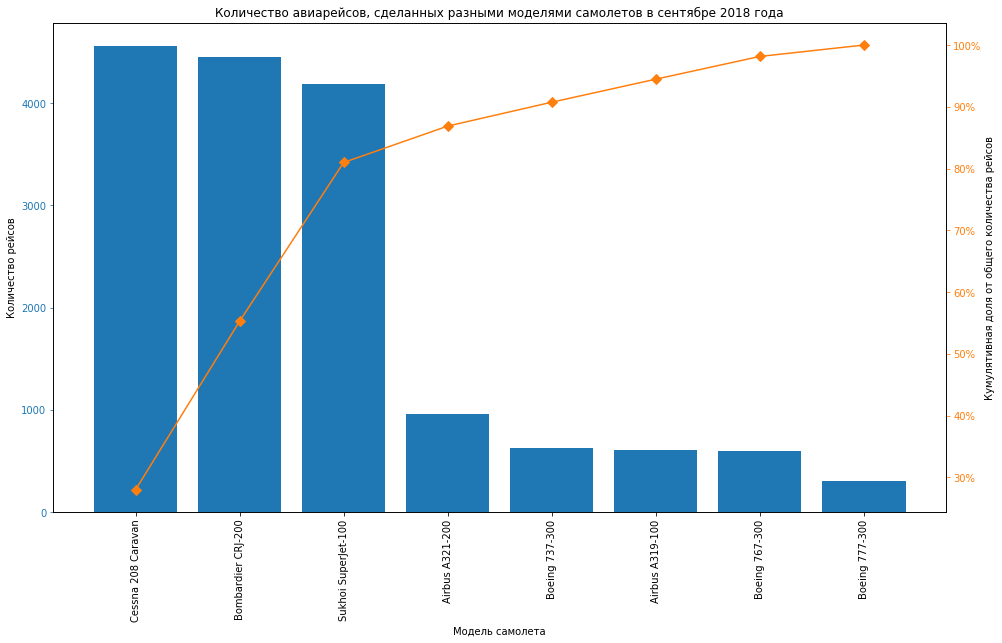

In [7]:
airplanes_sorted = airplanes.pivot_table(
    index='model',
    values = 'flights_amount')\
    .sort_values(
    by='flights_amount',
    ascending = False)

build_pareto(
    airplanes_sorted,
    'flights_amount',
    'Количество авиарейсов, сделанных разными моделями самолетов в сентябре 2018 года',
    'Модель самолета',
    'Количество рейсов',
    'Кумулятивная доля от общего количества рейсов'
)

Из диаграммы видно четкое различие в количестве рейсов, сделанных в сентябре 2018 первой тройкой моделей самолетов и остальными моделями.
Вероятно, три первых модели отличаются от других определенными характеристиками. 

Одной из основных характеристик самолетов является ***дальность полета***. Посмотрим, какова дальность полета каждой из представленных на диаграмме моделей. Выведем данную информацию в столбце ***max_distance_km*** таблицы ***airplanes_sorted***.

In [8]:
flight_distance = pd.DataFrame(
    {'max_distance_km':
     [1980,2500,3050,5900,4200,6900,9700,11170]},
    index = airplanes_sorted.index)

In [9]:
flight_distance

,max_distance_km
model,
Cessna 208 Caravan,1980
Bombardier CRJ-200,2500
Sukhoi SuperJet-100,3050
Airbus A321-200,5900
Boeing 737-300,4200
Airbus A319-100,6900
Boeing 767-300,9700
Boeing 777-300,11170


Построим диаграмму рассеяния для изучения зависимости количества рейсов за период от максимальной дальности полетов каждой из машин:

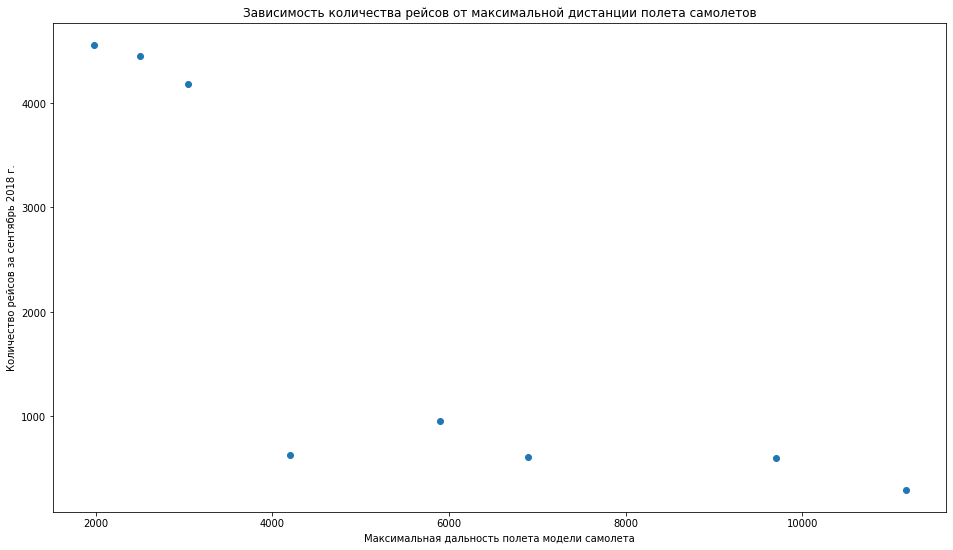

Коэффициент корреляции Пирсона:  -0.81


In [10]:
x = flight_distance['max_distance_km']
y = airplanes_sorted['flights_amount']
plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.title('Зависимость количества рейсов от максимальной дистанции полета самолетов')
plt.ylabel('Количество рейсов за сентябрь 2018 г.')
plt.xlabel('Максимальная дальность полета модели самолета')
plt.show()

print(
    'Коэффициент корреляции Пирсона: ',
    airplanes_sorted['flights_amount'].corr(
        flight_distance['max_distance_km'])\
        .round(2)
)

Связь количества рейсов самолетов за период с их максимальной дальностью полетов описывается сильной отрицательной зависимостью, т.е., чем больше дальность полетов самолета, тем меньше рейсов он делает за определенный период.

###### Вывод

Из построенной диаграммы Парето видно, что ***около 81%*** рейсов в сентябре 2018 года сделано следующими моделями самолетов:

 - ***Cessna 208 Caravan***;
 - ***Bombardier CRJ-200***;
 - ***Sukhoi Superjet-100***.
 
Данные самолеты предназначены для полетов на ближние и средние расстояния ( от 1000 до 6000 км ). 
 
При этом, ТОП-3 возглавляет ***Cessna 208 Caravan***, лёгкий одномоторный турбовинтовой самолёт, предназначенный для полетов на расстояния малой протяженности и рассчитанный на перевозку 14 пассажиров. Вероятнее всего самолет используется для перевозки пассажиров внутри регионов и между соседними регионами, причем его популярность может быть связана с возможностью работать как в стандартных, так и в сложных условиях, в том числе на грунтовых аэродромах с короткими взлетно-посадочными полосами.

***Bombardier CRJ-200*** и ***Sukhoi Superjet-100*** являются ближне/среднемагистральными самолетами. При этом дальность полета у ***Sukhoi Superjet-100*** выше остальных двух - в первой тройке самолеты расположились четко по возрастанию дальности полетов.

Количество рейсов остальных самолетов продолжает убывать с возрастанием максимальной дальности полетов, но в случае с ***Airbus A321-200*** мы видим выбивающуюся точку - несмотря на достаточно высокую дальность полета, самолет используется чаще, чем ***Boeing 737-300***, обладающий меньшей дальностью полета. Возможно, данное явление объясняется тем, что ***Airbus A321-200*** является основным конкурентом ***Boeing 737-300***, и более частое использование ***Airbus A321-200*** связано с более привлекательными технико-экономическими показателями модели.

Наименее часто полеты совершает модель с самой высокой максимальной дальностью полета - ***Boeing 777-300***.


### Анализ популярности городов

Посмотрим на распределение количества принимаемых авиарейсов разными городами:

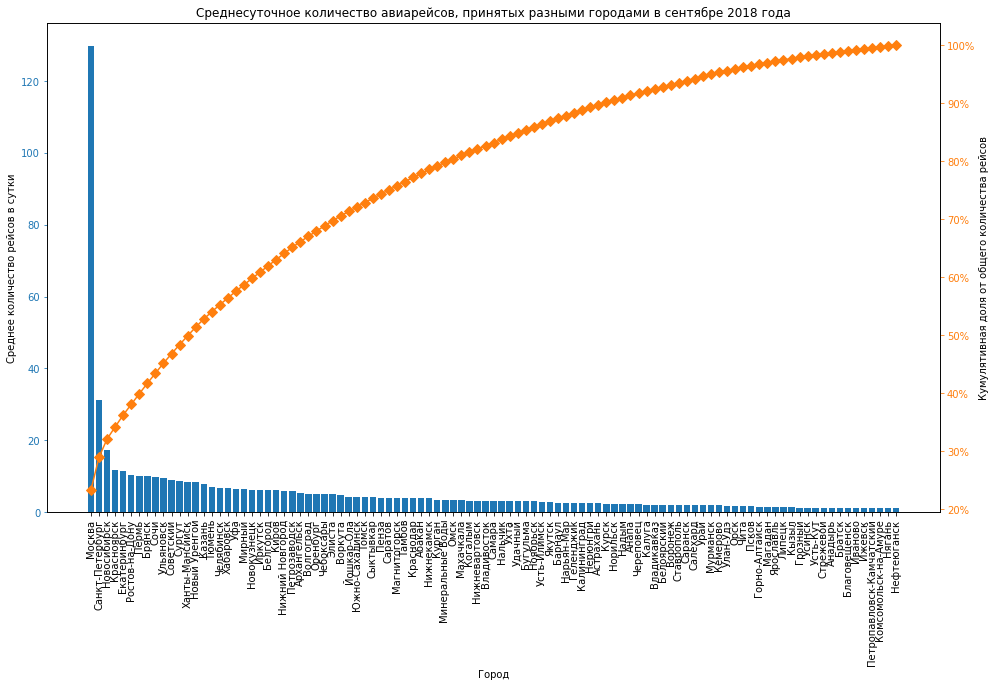

In [11]:
cities_sorted = cities.pivot_table(
    index='city',
    values = 'average_flights')\
    .sort_values(
    by='average_flights',
    ascending = False)

build_pareto(
    cities_sorted,
    'average_flights',
    'Среднесуточное количество авиарейсов, принятых разными городами в сентябре 2018 года',
    'Город',
    'Среднее количество рейсов в сутки',
    'Кумулятивная доля от общего количества рейсов'
)

На диаграмме сильно выделяются ***первые три города***, принявшие ***треть всех авиарейсов*** в сентябре месяце: 

 - Москва;
 - Санкт-Петербург;
 - Новосибирск.
 
Кроме того, ***около половины всех рейсов*** в сентябре 2018 года было принято лишь ***10 из 101*** рассматриваемого города.

Подробнее рассмотрим ТОП-10 городов по количеству ежесуточно принимаемых рейсов в сентябре месяце:

In [12]:
top10_cities = cities_sorted[['average_flights']].head(10)
top10_cities

,average_flights
city,
Москва,129.774194
Санкт-Петербург,31.161290
Новосибирск,17.322581
Красноярск,11.580645
Екатеринбург,11.322581
Ростов-на-Дону,10.193548
Пермь,10.129032
Брянск,10.000000
Сочи,9.612903


Отобразим графически ТОП-10 городов:

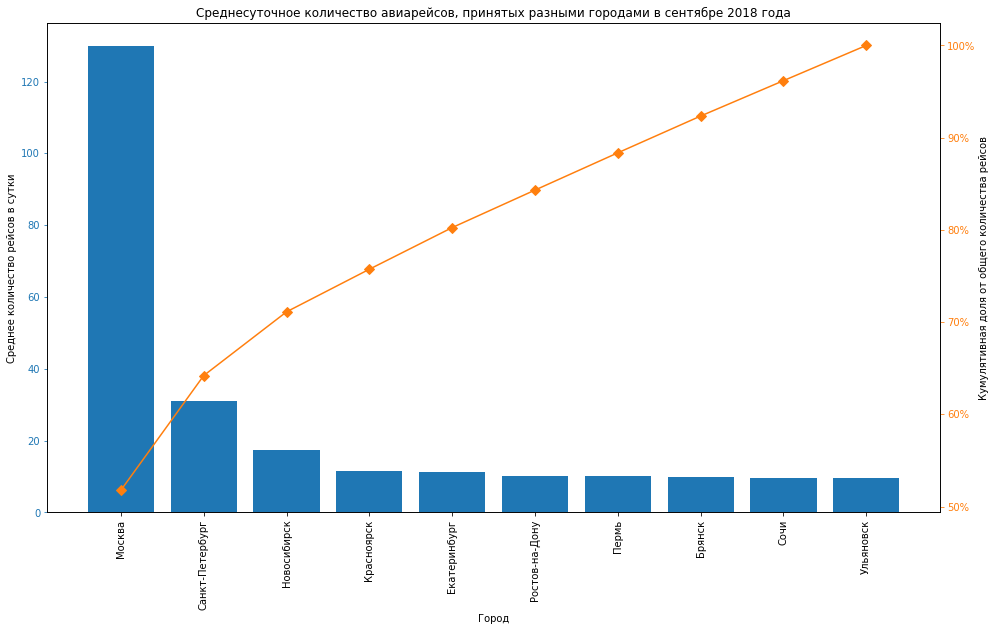

In [13]:
build_pareto(
    top10_cities,
    'average_flights',
    'Среднесуточное количество авиарейсов, принятых разными городами в сентябре 2018 года',
    'Город',
    'Среднее количество рейсов в сутки',
    'Кумулятивная доля от общего количества рейсов'
)

###### Вывод

Из рассмотренных 101 города ***около 33% рейсов в сутки*** приходится на следующие (в порядке убывания):

 - Москва;
 - Санкт - Петербург;
 - Новосибирск.
 
Также перечисленные три города в сумме принимают ***свыше 70%*** рейсов из городов, входящих в ***ТОП-10***.
 
На ***ТОП-10*** популярных города приходится ***около 45% рейсов в сутки*** от общего количества ежесуточных рейсов в 101 город страны. 

## Общий вывод

В ходе данного проекта были изучены и проанализированы данные за ***сентябрь 2018 года*** о количестве рейсов определенных моделей самолетов, а также о среднесуточном количестве рейсов, прибывающих в разные города.

Было выяснено, что наибольшее количество внутренних воздушных перемещений совершается на расстояния ***до 3050 километров***, исходя из наибольшей популярности ближне- и среднемагистральных самолётов. Большое количество перемещений на ближние и средние расстояния также связано с возможностью совершать ближне- и среднемагистральными самолетами большее количество рейсов в сутки, т.к. полеты на меньшие расстояния занимают меньше времени.

Около ***половины всех рейсов*** приходится на ***10 из 101 города*** РФ. На них приходится ***45% авиарейсов*** за сутки.

***Москва, Санкт-Петербург и Новосибирск*** составляют ***ТОП-3*** наиболее популярных городов с точки зрения принимаемых авиарейсов. Более того, они принимают ***33% рейсов*** от общего количества рейсов, принимаемых за сутки 101 городом.  Это связано с тем, что ТОП-3 - крупнейшие авиатранспортные узлы РФ, принимающие самолеты со всех уголков страны, а соответственно, всех типов по протяженности полета: ближне-, средне-, и дальнемагистральные и позволяющие продолжить полет практически в любом направлении в стране и вне страны.

Остальные города из ***ТОП-10***, вероятнее всего, чаще других (за исключением городов из ТОП-3) используются как точки пересадок при перелетах в пределах РФ.

Заметно меньшая популярность остальных городов из общего списка может быть связана с тем, что чаще всего они являются конечными пунктами назначения.